# ABHINAV MANE 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
ter = pd.read_csv(r"G:\Python Practice\globalterrorism.csv",encoding='latin1')

In [3]:
ter.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
print("Total missing values are: ",(ter.isna().sum()).sum())

Total missing values are:  13853997


In [5]:
print("Total percentage of missing values is: ",((ter.isna().sum()).sum()/(ter.size))*100)

Total percentage of missing values is:  56.481718962414206


In [6]:
ter = ter.rename (columns = {"eventid":"Event_ID", "iyear":"Year", "imonth":"Month", "iday":"Day", "country_txt":"Country", 
                           "region_txt":"Region", "provstate":"State",
                           "success":"Success", "suicide":"Suicide", "attacktype1_txt":"Attack_type", 
                           "targtype1_txt":"Target_type", "natlty1_txt":"Nationality", "gname":"Group_name", 
                           "weaptype1_txt":"Weapon_type", "nkill":"Killed", "nwound":"Wounded", 
                           "dbsource":"Database_source"
                          })

In [7]:
ter.columns[ter.isnull().any()]

Index(['approxdate', 'resolution', 'State', 'city', 'latitude', 'longitude',
       'specificity', 'location', 'summary', 'doubtterr',
       ...
       'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt',
       'nreleased', 'addnotes', 'scite1', 'scite2', 'scite3', 'related'],
      dtype='object', length=106)

In [8]:
ter = ter[["Event_ID", "Year", "Month", "Day", "Country", "Region", "State", "Success", "Suicide",
         "Attack_type", "Target_type", "Weapon_type", "Killed", "Wounded", "Nationality", "Group_name",
         "Database_source"]]
ter.head()

,Event_ID,Year,Month,Day,Country,Region,State,Success,Suicide,Attack_type,Target_type,Weapon_type,Killed,Wounded,Nationality,Group_name,Database_source
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,1,0,Assassination,Private Citizens & Property,Unknown,1.0,0.0,Dominican Republic,MANO-D,PGIS
1,197000000002,1970,0,0,Mexico,North America,Federal,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,Belgium,23rd of September Communist League,PGIS
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,1,0,Assassination,Journalists & Media,Unknown,1.0,0.0,United States,Unknown,PGIS
3,197001000002,1970,1,0,Greece,Western Europe,Attica,1,0,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN,United States,Unknown,PGIS
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,United States,Unknown,PGIS


In [9]:
ter.shape

(181691, 17)

In [10]:
ter.isnull().sum()

Event_ID               0
Year                   0
Month                  0
Day                    0
Country                0
Region                 0
State                421
Success                0
Suicide                0
Attack_type            0
Target_type            0
Weapon_type            0
Killed             10313
Wounded            16311
Nationality         1559
Group_name             0
Database_source        0
dtype: int64

In [11]:
ter["Killed"] = ter.Killed.fillna(0).astype(int)
ter['Wounded'] = ter.Wounded.fillna(0).astype(int)

In [12]:
ter.dropna(subset=["State"], inplace=True)
ter.dropna(subset=["Nationality"],inplace=True)

In [13]:
ter.isnull().sum()

Event_ID           0
Year               0
Month              0
Day                0
Country            0
Region             0
State              0
Success            0
Suicide            0
Attack_type        0
Target_type        0
Weapon_type        0
Killed             0
Wounded            0
Nationality        0
Group_name         0
Database_source    0
dtype: int64

In [14]:
ter.shape

(179715, 17)

<AxesSubplot:xlabel='Success', ylabel='count'>

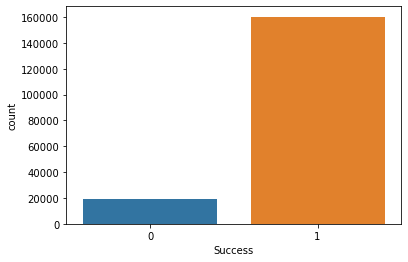

In [15]:
sns.countplot(x=ter['Success'],data=ter)

In [16]:
success = len(ter[ter['Success']==1])
failed = len(ter[ter['Success']==0])
l = [success,failed]

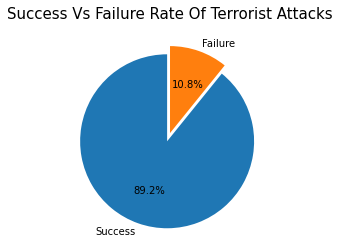

In [17]:
plt.pie(l,labels=['Success','Failure'],autopct='%.1f%%',startangle=90,explode=[0.1,0])
plt.title("Success Vs Failure Rate Of Terrorist Attacks",fontsize=15)
plt.show()

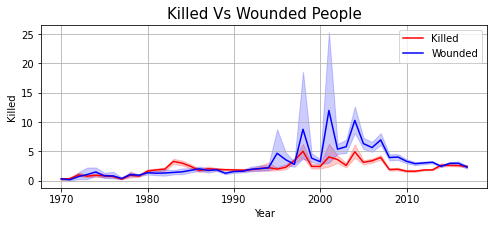

In [18]:
fig, ax = plt.subplots(figsize = (8,3))
sns.lineplot(x = ter.Year,y = ter.Killed, color = 'red', label = "Killed", ax = ax)
sns.lineplot(x = ter.Year,y = ter.Wounded, color = 'blue', label = "Wounded", ax = ax)
plt.title("Killed Vs Wounded People",fontsize = 15)
plt.grid()
plt.show()


In [20]:
df1 = pd.DataFrame(ter.groupby('Country').sum())
df1.sort_values(by = ['Success'],inplace = True,ascending = False)

#top 10 states with successful terorrist attacks
df2 = ter.groupby("State").sum()
df2.sort_values(by = ['Success'],inplace = True,ascending = False)

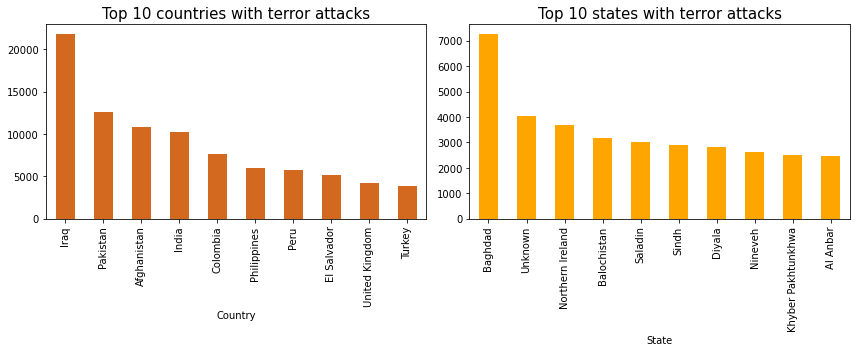

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5))
df1.Success.head(10).plot.bar(color = 'chocolate', ax = ax1)
ax1.set_title("Top 10 countries with terror attacks",fontsize = 15)

df2.Success.head(10).plot.bar(color = 'orange', ax = ax2)
ax2.set_title("Top 10 states with terror attacks",fontsize = 15)

plt.tight_layout()
plt.show()

In [23]:
df3 = pd.DataFrame(ter.groupby("Nationality").sum())
df3.sort_values(by = ["Success"],inplace = True, ascending = False)

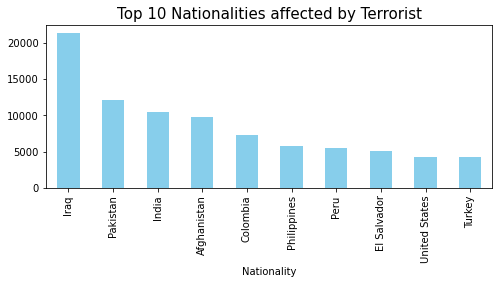

In [24]:
fig, ax = plt.subplots(figsize=(8,3))

df3.Success.head(10).plot.bar(color = "skyblue")

plt.title("Top 10 Nationalities affected by Terrorist", fontsize = 15)
plt.show()

In [25]:
df4 = pd.DataFrame(ter.groupby("Group_name").sum())
df4.sort_values(by = ["Success"],inplace = True, ascending = False)

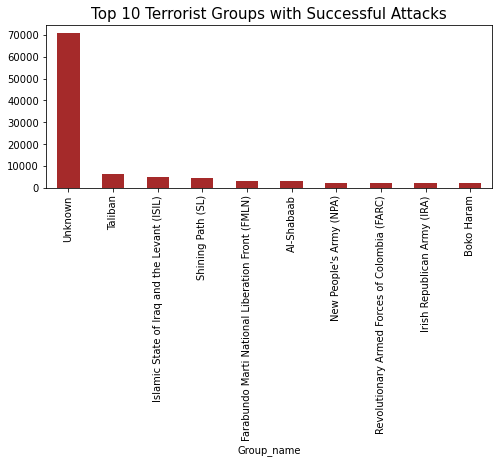

In [27]:
fig, ax = plt.subplots(figsize=(8,3))

df4.Success.head(10).plot.bar(color = "brown")

plt.title("Top 10 Terrorist Groups with Successful Attacks", fontsize = 15)
plt.show()

In [29]:
df5 = ter.groupby("Database_source").sum()

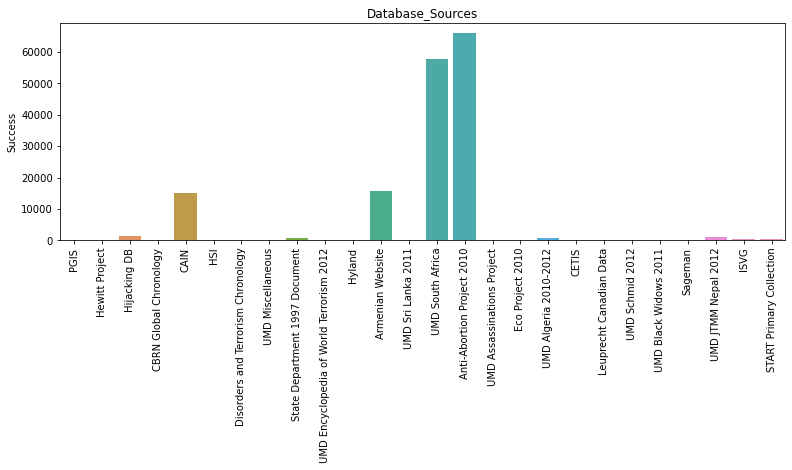

In [32]:
fig, (ax3)= plt.subplots(figsize = (13,4))

f = sns.barplot(x = ter.Database_source.unique(), y = df5.Success)
f.set_xticklabels(f.get_xticklabels(), rotation=90)
f.set(title= "Database_Sources")

plt.show()

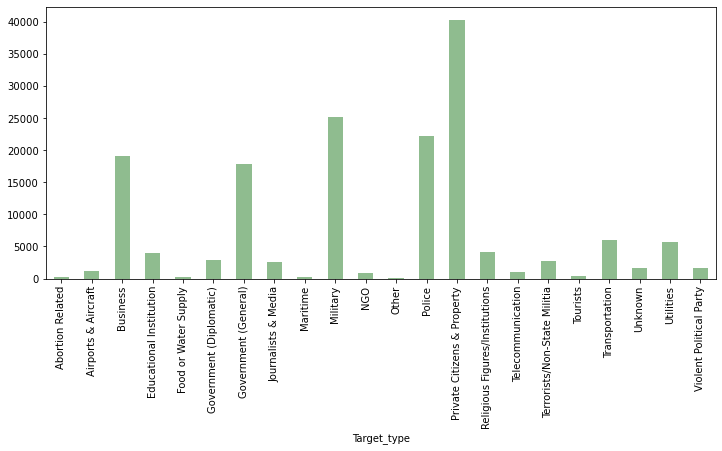

In [33]:
fig, ax = plt.subplots(figsize = (12,5))
ter.groupby("Target_type").sum().Success.plot(kind = "bar", color = "darkseagreen")
plt.show()